-[Cross validation using grid search](https://www.kaggle.com/code/muhammetvarl/keras-multiclass-classification-cross-validation)

-[resnet50Docs](https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.signal
import keras
import ipywidgets as widgets
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


(89400, 5)
(89400, 16, 16, 3)
(595, 5)
(595, 16, 16, 3)
[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 2

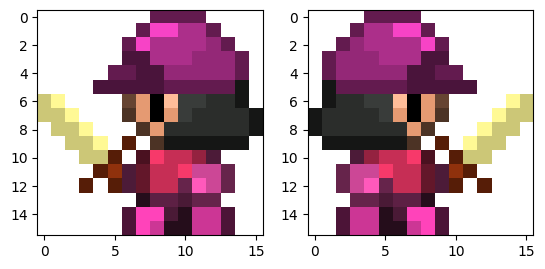

In [19]:
data = np.load('./Dataset1/sprites_labels.npy')
sprites = np.load('./Dataset1/sprites.npy')

print(data.shape)
print(sprites.shape)

selected_data = data[:894]
selected_data = np.delete(selected_data, slice(244, 543), axis=0) #deletes duplicates
print(selected_data.shape)

selected_sprites = sprites[:894]
selected_sprites = np.delete(selected_sprites, slice(244, 543), axis=0) #deletes duplicates
print(selected_sprites.shape)

data_with_mirrored = np.concatenate((selected_data, selected_data), axis=0)

mirrored_sprites = np.flip(selected_sprites, axis=2)
sprites_with_mirrored = np.concatenate((selected_sprites, mirrored_sprites), axis=0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(selected_sprites[1])
ax[1].imshow(mirrored_sprites[1]);

print(sprites_with_mirrored)


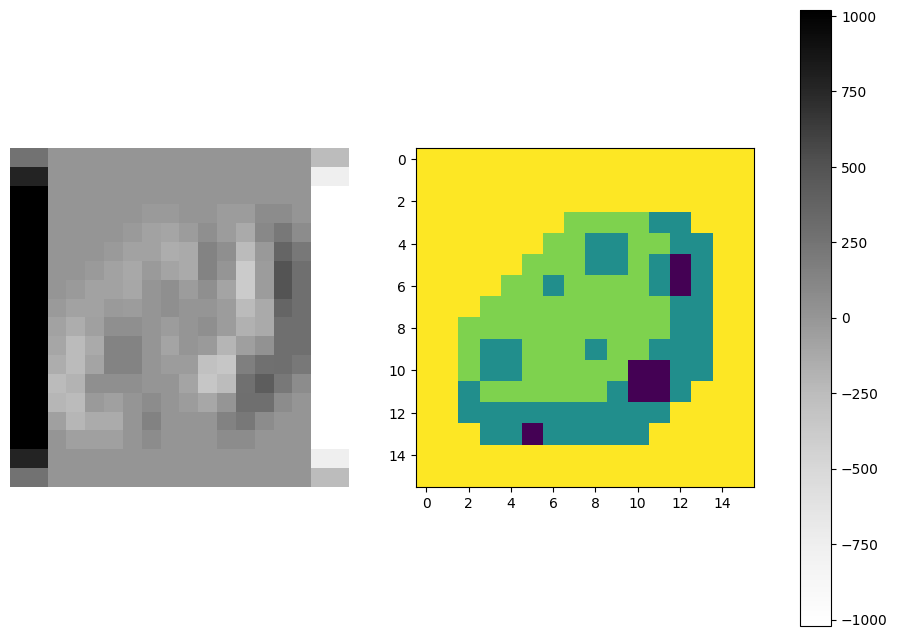

In [20]:
X_train, X_test, y_train, y_test = train_test_split(sprites_with_mirrored, data_with_mirrored)

y_train_one_hot = tf.keras.utils.to_categorical(y_train, 5)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 5)



fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


conv_result = scipy.signal.convolve2d(X_train[400, :, :, :1].reshape(16, 16), np.array([[1,2,1],[0,0,0],[-1,-2,-1]]).T)
im = ax.imshow(conv_result, cmap='Greys')
ax2.imshow(X_train[400, :, :, :1])
ax.axis('off')
fig.colorbar(im, ax=[ax, ax2]);



In [21]:


'''
conv_network = tf.keras.Sequential()

conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Flatten())

conv_network.add(tf.keras.layers.Dense(100, activation='relu'))
conv_network.add(tf.keras.layers.Dense(10, activation='softmax'))

'''




data1 = np.load('./Dataset1/sprites_labels.npy')
sprites1 = np.load('./Dataset1/sprites.npy')

selected_labels = data1[:894]
y = np.delete(selected_labels, slice(244, 543), axis=0)

selected_sprites = sprites1[:894]
X = np.delete(selected_sprites, slice(244, 543), axis=0)

X = X.astype(np.float32) / 255









In [22]:
model = keras.models.Sequential([
    keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,3)),
    #keras.layers.Conv2D(196, (3, 3), strides=(1,1), activation='relu', input_shape=(16,16,3)),
    keras.layers.Flatten(input_shape=(16, 16, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
]);

#other activations functions tried include sigmoid and different orders of relu and softmax

c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
predictions = model(X_train[:1]).numpy()
print(predictions)

[[1.8032144e-19 1.0000000e+00 0.0000000e+00 3.6022981e-12 4.1474057e-20]]


In [24]:
tf.nn.softmax(predictions).numpy()

array([[0.14884758, 0.40460962, 0.14884758, 0.14884758, 0.14884758]],
      dtype=float32)

In [25]:
loss_fn = keras.losses.CategoricalCrossentropy()


In [26]:
loss_fn(y_train[:1], predictions).numpy()

16.118095

In [27]:
'''
loss_fn1 = keras.losses.CategoricalFocalCrossentropy()
loss_fn1(y_train[:1], predictions).numpy()
'''

#loss_fn2 = keras.losses.SparseCategoricalCrossentropy()
#loss_fn2(y_train[:2], predictions).numpy()

model.compile(optimizer='Adam', loss=loss_fn, metrics=['accuracy'])

#Tried with RMSProp, SGD, Adadelta. Adam appears to have the most acc

In [28]:
historyConv = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 100, epochs=20)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3895 - loss: 38.3665 - val_accuracy: 0.7617 - val_loss: 2.0567
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6712 - loss: 3.2641 - val_accuracy: 0.8087 - val_loss: 1.1350
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7737 - loss: 1.0165 - val_accuracy: 0.8255 - val_loss: 0.3993
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8350 - loss: 0.4562 - val_accuracy: 0.8725 - val_loss: 0.3303
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8624 - loss: 0.3883 - val_accuracy: 0.9161 - val_loss: 0.2894
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8888 - loss: 0.3198 - val_accuracy: 0.9262 - val_loss: 0.2133
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9129 - loss: 0.2402 - val_accuracy: 0.9228 - val_loss: 0.1809
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9096 - loss: 0.2026 - val_accuracy: 0.9396 - val_loss: 0.1636
Epoch 

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 49)       │         1,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2401)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       153,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,277 (1.78 MB)

 Trainable params: 155,425 (607.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 310,852 (1.19 MB)

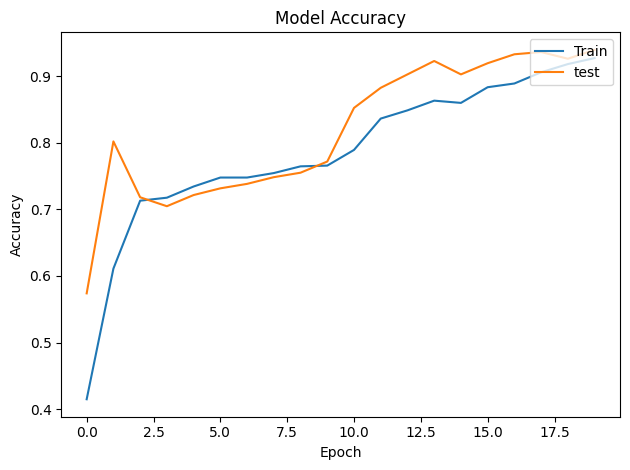

In [27]:
plt.plot(historyConv.history['accuracy'], label='Train')
plt.plot(historyConv.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.tight_layout()

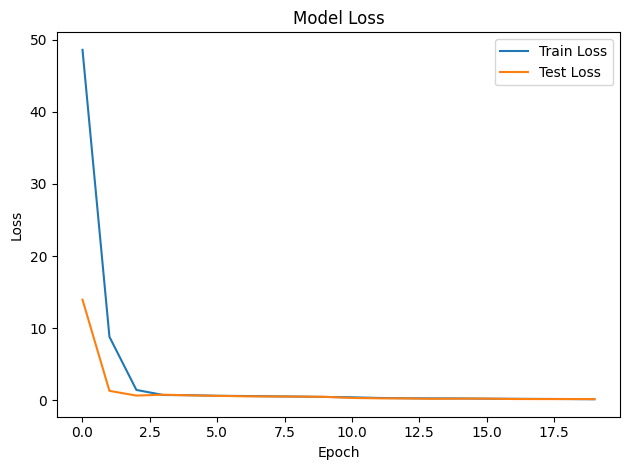

In [26]:
plt.plot(historyConv.history['loss'], label='Train Loss')
plt.plot(historyConv.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.tight_layout()

In [31]:
model.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - 2ms/step - accuracy: 0.9765 - loss: 0.0868


[0.08682893216609955, 0.9765100479125977]

In [32]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.14884758, 0.14884758, 0.14884758, 0.40460962, 0.14884758],
       [0.14884761, 0.14884761, 0.14884761, 0.1488477 , 0.40460947],
       [0.14885317, 0.14885317, 0.14885317, 0.14887498, 0.40456548],
       [0.1488733 , 0.14887598, 0.4044061 , 0.14897126, 0.1488733 ],
       [0.1488513 , 0.1488513 , 0.14886585, 0.4045802 , 0.1488513 ]],
      dtype=float32)>

In [33]:
import ipywidgets as widgets
label_names = ['Character (FORWARD)', 'Monster', 'Food', 'Item', 'Character (SIDE)']
index_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description='Image index:')
def show_image(index):
    plt.imshow(X_test[index])
    plt.show()
    prediction = probability_model(X_test[index:index+1]).numpy()
    print(f'Predicted label: {np.argmax(prediction)} ({label_names[np.argmax(prediction)]})')
    print(f'Actual label: {np.argmax(y_test[index])} ({label_names[np.argmax(y_test[index])]})')
    print('Predicted probabilities:')
    print(f'    Character (FORWARD): {'%.2f' % (prediction[0][0] * 100)}%')
    print(f'    Monster:             {'%.2f' % (prediction[0][1] * 100)}%')
    print(f'    Food:                {'%.2f' % (prediction[0][2] * 100)}%')
    print(f'    Item:                {'%.2f' % (prediction[0][3] * 100)}%')
    print(f'    Character (SIDE):    {'%.2f' % (prediction[0][4] * 100)}%')
widgets.interactive(show_image, index=index_slider)

interactive(children=(IntSlider(value=0, description='Image index:', max=297), Output()), _dom_classes=('widge…

In [34]:
from time import time
def create_model(optimizer='adam', loss='categorical_crossentropy'):
    model = keras.models.Sequential()
    #model.add(keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,3)))
    model.add(keras.layers.Conv2D(256, (3, 3), strides=(1,1), activation='relu', input_shape=(16,16,3)))
    model.add(keras.layers.Flatten(input_shape=(16, 16, 3)))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(5, activation='softmax'))
    
    model.compile(loss= loss, optimizer=optimizer,metrics=["accuracy"])
    return model

'''
resNet50Model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(16, 16, 3),
    pooling=None,
    classes=5,
    classifier_activation='softmax'
)

for layer in resNet50Model.layers:
    layer.trainable=False
    
dnn_model = keras.models.Sequential()
dnn_model.add(resNet50Model)
dnn_model.add(keras.layers.Flatten())
dnn_model.add(keras.layers.Dense(512, activation='relu'))
dnn_model.add(keras.layers.Dense(5, activation='softmax'))
'''

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=43, shuffle=True)

'''
param_grid = {
    'epochs' : [50, 100, 150],
    'batch_size' : [32, 50, 100],
    'optimizer' : ['Adam', 'Adadelta', 'SGD']
}

model_cv = KerasClassifier(build_fn=create_model, verbose=1)

random_search = RandomizedSearchCV(
    model_cv, param_distributions=param_grid, n_iter=15
)

random_model = random_search.fit(X,y)

start = time()
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), 15)
)
report(random_search.cv_results_)
'''

'''
 'epochs' : [50, 100, 150],
'batch_size' : [32, 50, 100],
'''
param_grid = {
    'epochs' : [50, 150],
    'batch_size' : [32, 100],
    'optimizer' : ['Adam', 'Adadelta', 'SGD'],
    'loss' : ['MSE', 'categorical_crossentropy', 'poisson']
}

model_cv = KerasClassifier(build_fn=create_model, verbose=1, optimizer='adam', loss='categorical_crossentropy')

grid = GridSearchCV(estimator=model_cv,  
                    n_jobs=-1, 
                    verbose=1,
                    cv=5,
                    param_grid=param_grid)

grid_cv_model = grid.fit(X_train, y_train,)

y_pred = grid_cv_model.predict(X_validate)


print("Accuracy: ", np.mean(y_validate == y_pred))

means = grid_cv_model.cv_results_['mean_test_score'] # Mean of test scores
stds = grid_cv_model.cv_results_['std_test_score'] # standard deviations of test scores
params = grid_cv_model.cv_results_['params'] # parameters used
# to print all scores, standard deviations and parameters used

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Printing the Best Parameters as a Result of Grid Search Cross Validation on the Screen
print("Best: %f using %s" % (grid_cv_model.best_score_, grid_cv_model.best_params_))



Fitting 5 folds for each of 72 candidates, totalling 360 fits


ValueError: Invalid parameter add_conv_layer for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(add_conv_layer=True)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:
#cross val with grid cv

'''
random_cv_model = random_model.best_estimator_
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(random_cv_model, X_cv, np.argmax(y_test, axis=1), cv=kfold,scoring= 'accuracy')

'''
cv_model = grid_cv_model.best_estimator_

kfold = KFold(n_splits=5, shuffle=True)

results = cross_val_score(cv_model, X,y, cv=kfold,scoring= 'accuracy')


Epoch 1/50


c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5098 - loss: 1.2675  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7550 - loss: 0.6372 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.3126 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9516 - loss: 0.2032 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9446 - loss: 0.1622 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9630 - loss: 0.1256 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.1006 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9876 - loss: 0.0616 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9767 - loss: 0.0758 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9982 - loss: 0.0447 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9976 - loss: 0.0272 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - l

c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5227 - loss: 1.2328  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7146 - loss: 0.7835 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8540 - loss: 0.4368 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9226 - loss: 0.2683 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9582 - loss: 0.1738 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9852 - loss: 0.1081 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9766 - loss: 0.1054 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9786 - loss: 0.0846 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9820 - loss: 0.0649 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9974 - loss: 0.0417 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9994 - loss: 0.0316 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - l

c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4791 - loss: 1.3185  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8191 - loss: 0.5854 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9284 - loss: 0.2670 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9576 - loss: 0.1386 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9669 - loss: 0.1051 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9947 - loss: 0.0568 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9943 - loss: 0.0412 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9893 - loss: 0.0387 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9923 - loss: 0.0406 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0207 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0143 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - l

c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5128 - loss: 1.3246  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7493 - loss: 0.7105 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9044 - loss: 0.3709 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9560 - loss: 0.2083 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9657 - loss: 0.1636 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9633 - loss: 0.1306 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9862 - loss: 0.0805 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9951 - loss: 0.0601 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9893 - loss: 0.0697 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9969 - loss: 0.0354 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0361 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - l

c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5752 - loss: 1.2388  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7487 - loss: 0.6823 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8957 - loss: 0.3453 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9520 - loss: 0.1907 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.1168 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9833 - loss: 0.0764 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.0785 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9971 - loss: 0.0404 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9971 - loss: 0.0389 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9942 - loss: 0.0336 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0272 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9987 - l

In [ ]:
#print kfold results
print('K-fold Cross Validation Accuracy Results: ', results)
print('K-fold Cross Validation Accuracy Results Mean: ', results.mean())


y_pred = cv_model.predict(X_train)
print('X_train shape: ', X_train.shape)
print("y_test shape:", y_test.shape)
print("y_validate shape:", y_validate.shape)
print("y_pred shape:", y_pred.shape)
y_test_int = y_test.astype(int) #make sure y_test and y_pred are compatible
test_acc = cross_val_score(cv_model, X, y, scoring = 'accuracy')
print('Evaluate on test set: ', np.mean(test_acc))

K-fold Cross Validation Accuracy Results:  [0.98319328 0.99159664 0.99159664 0.97478992 0.98319328]
K-fold Cross Validation Accuracy Results Mean:  0.984873949579832
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
X_train shape:  (380, 16, 16, 3)
y_test shape: (119, 5)
y_validate shape: (96, 5)
y_pred shape: (380, 5)
Epoch 1/50


c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6740 - loss: 1.0968  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7086 - loss: 0.7270 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8311 - loss: 0.4107 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9276 - loss: 0.2415 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9826 - loss: 0.1391 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9930 - loss: 0.0993 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9935 - loss: 0.0594 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9954 - loss: 0.0506 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9987 - loss: 0.0399 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0332 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9935 - loss: 0.0252 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9996 - l

c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6050 - loss: 1.0559  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.4478 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9184 - loss: 0.2835 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9816 - loss: 0.1254 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9865 - loss: 0.0915 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9832 - loss: 0.0755 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9822 - loss: 0.0741 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9873 - loss: 0.0485 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9918 - loss: 0.0363 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9901 - loss: 0.0352 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9929 - loss: 0.0268 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - l

c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4214 - loss: 1.3886   
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6421 - loss: 0.9070 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8909 - loss: 0.4287 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9161 - loss: 0.3010 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.1775 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9793 - loss: 0.1136 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9836 - loss: 0.0982 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.0638 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0447 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.0524 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9860 - loss: 0.0489 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9934 - 

c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4232 - loss: 1.4141   
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6942 - loss: 0.7834 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8966 - loss: 0.4485 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9546 - loss: 0.2297 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9666 - loss: 0.1479 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.1206 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9876 - loss: 0.0790 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0701 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0429 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9994 - loss: 0.0377 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0248 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - 

c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Erik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4682 - loss: 1.3844  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7032 - loss: 0.8660 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8862 - loss: 0.4685 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9275 - loss: 0.3041 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9692 - loss: 0.1817 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9714 - loss: 0.1423 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9768 - loss: 0.1227 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9867 - loss: 0.0767 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9844 - loss: 0.0816 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0601 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0524 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9969 - l

In [ ]:

'''
#evaluating acc of resNet50 model compaired to our model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

resNet50Model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(16, 16, 3),
    pooling=None,
    classes=5,
    classifier_activation='softmax'
)

for layer in resNet50Model.layers:
    layer.trainable=False
    
dnn_model = keras.models.Sequential()
dnn_model.add(resNet50Model)
dnn_model.add(keras.layers.Flatten())
dnn_model.add(keras.layers.Dense(512, activation='relu'))
dnn_model.add(keras.layers.Dense(5, activation='softmax'))

dnn_model.summary()
dnn_model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


resnetHistory = dnn_model.fit(X_train, validation_data = X_test, epochs = 20)
'''

C:\Users\cjbea\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\cjbea\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


"\n#evaluating acc of resNet50 model compaired to our model\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)\n\nresNet50Model = tf.keras.applications.ResNet50(\n    include_top=False,\n    weights='imagenet',\n    input_tensor=None,\n    input_shape=(16, 16, 3),\n    pooling=None,\n    classes=5,\n    classifier_activation='softmax'\n)\n\nfor layer in resNet50Model.layers:\n    layer.trainable=False\n    \ndnn_model = keras.models.Sequential()\ndnn_model.add(resNet50Model)\ndnn_model.add(keras.layers.Flatten())\ndnn_model.add(keras.layers.Dense(512, activation='relu'))\ndnn_model.add(keras.layers.Dense(5, activation='softmax'))\n\ndnn_model.summary()\ndnn_model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])\n\n\nresnetHistory = dnn_model.fit(X_train, validation_data = X_test, epochs = 20)\n"